## Titanic: Exploratory Data Analysis, Visualization and Machine Learning

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. Dataset 확인

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null Data Check

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
for i in df_train.columns:
  msg = 'column: {:>10}\t Percent of Nan value: {:.2f}'.format(i,
                                                              100*(df_train[i].isnull().sum()/df_train[i].shape[0]))
  print(msg)

column: PassengerId	 Percent of Nan value: 0.00
column:   Survived	 Percent of Nan value: 0.00
column:     Pclass	 Percent of Nan value: 0.00
column:       Name	 Percent of Nan value: 0.00
column:        Sex	 Percent of Nan value: 0.00
column:        Age	 Percent of Nan value: 19.87
column:      SibSp	 Percent of Nan value: 0.00
column:      Parch	 Percent of Nan value: 0.00
column:     Ticket	 Percent of Nan value: 0.00
column:       Fare	 Percent of Nan value: 0.00
column:      Cabin	 Percent of Nan value: 77.10
column:   Embarked	 Percent of Nan value: 0.22


In [13]:
for i in df_test.columns:
  msg  = 'column: {:>10}\t Percent of Nan value : {:.2f}'.format(i, 
                                                                100*(df_test[i].isnull().sum()/df_test[i].shape[0]))
  
  print(msg)

column: PassengerId	 Percent of Nan value : 0.00
column:     Pclass	 Percent of Nan value : 0.00
column:       Name	 Percent of Nan value : 0.00
column:        Sex	 Percent of Nan value : 0.00
column:        Age	 Percent of Nan value : 20.57
column:      SibSp	 Percent of Nan value : 0.00
column:      Parch	 Percent of Nan value : 0.00
column:     Ticket	 Percent of Nan value : 0.00
column:       Fare	 Percent of Nan value : 0.24
column:      Cabin	 Percent of Nan value : 78.23
column:   Embarked	 Percent of Nan value : 0.00


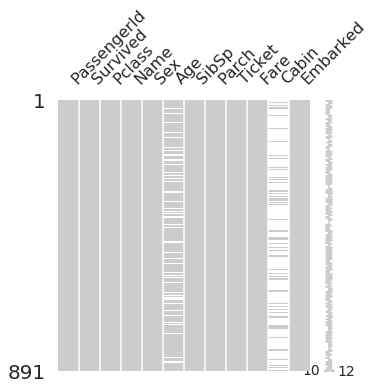

In [14]:
msno.matrix(df=df_train.iloc[:,:], figsize=(5,5), color = (0.8, 0.8, 0.8))

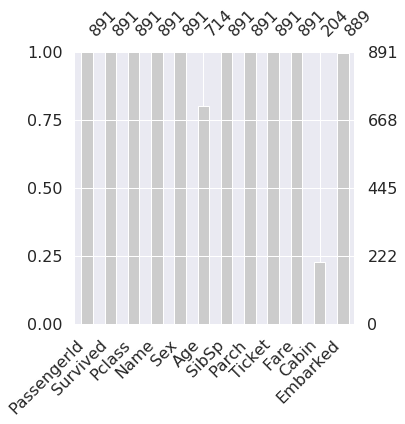

In [15]:
msno.bar(df=df_train.iloc[:,:], figsize=(5,5), color=(0.8, 0.8, 0.8))

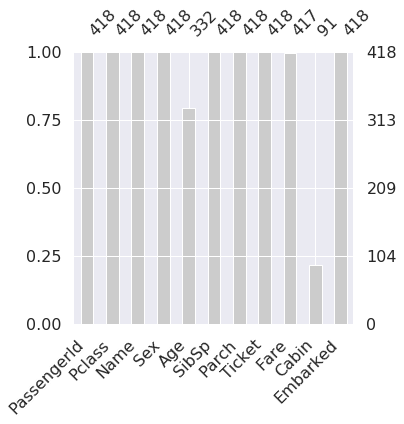

In [16]:
msno.bar(df=df_test.iloc[:,:], figsize=(5,5), color=(0.8, 0.8, 0.8))

### 1.2 Target Label 확인

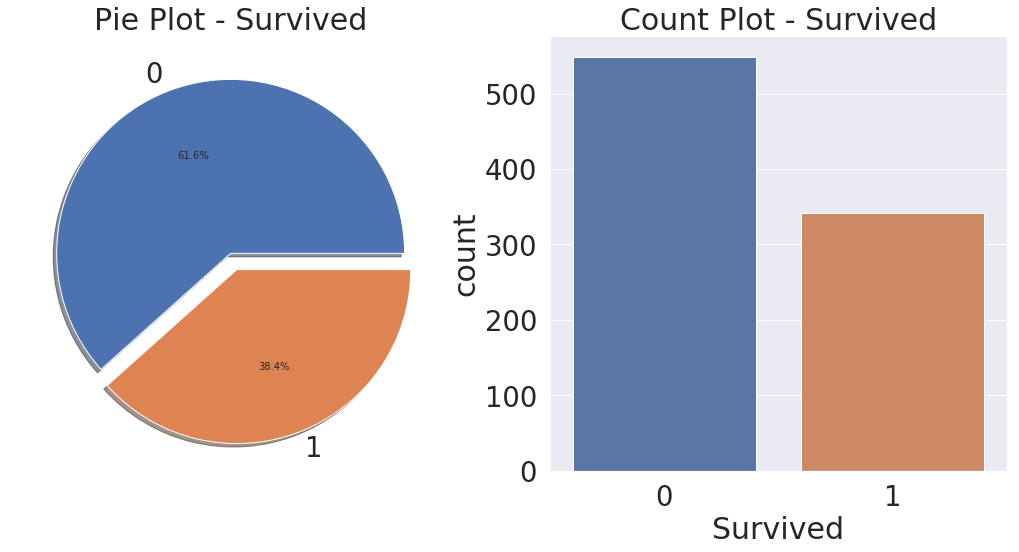

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

In [20]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 2. Exploratory Data Analysis

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


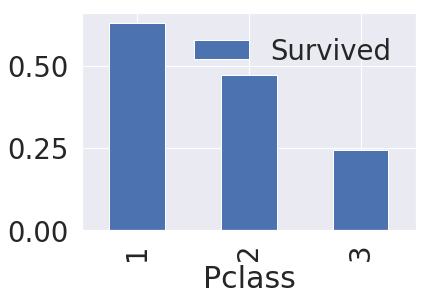

In [26]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

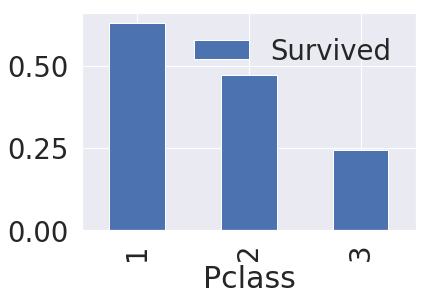

In [32]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

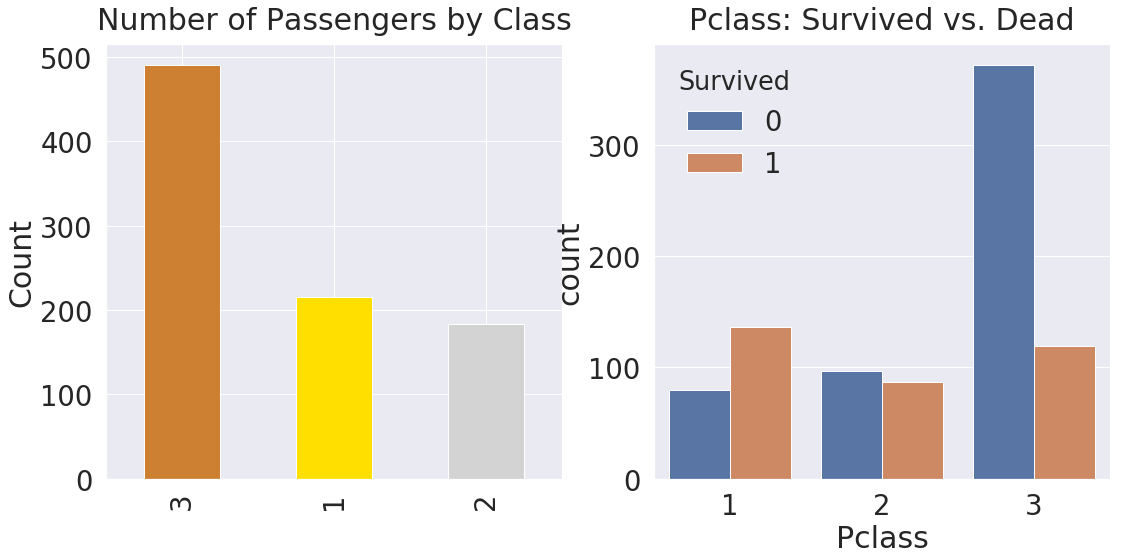

In [34]:
y_position=1.02

f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Class', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)

plt.show()

### 2.2 Sex

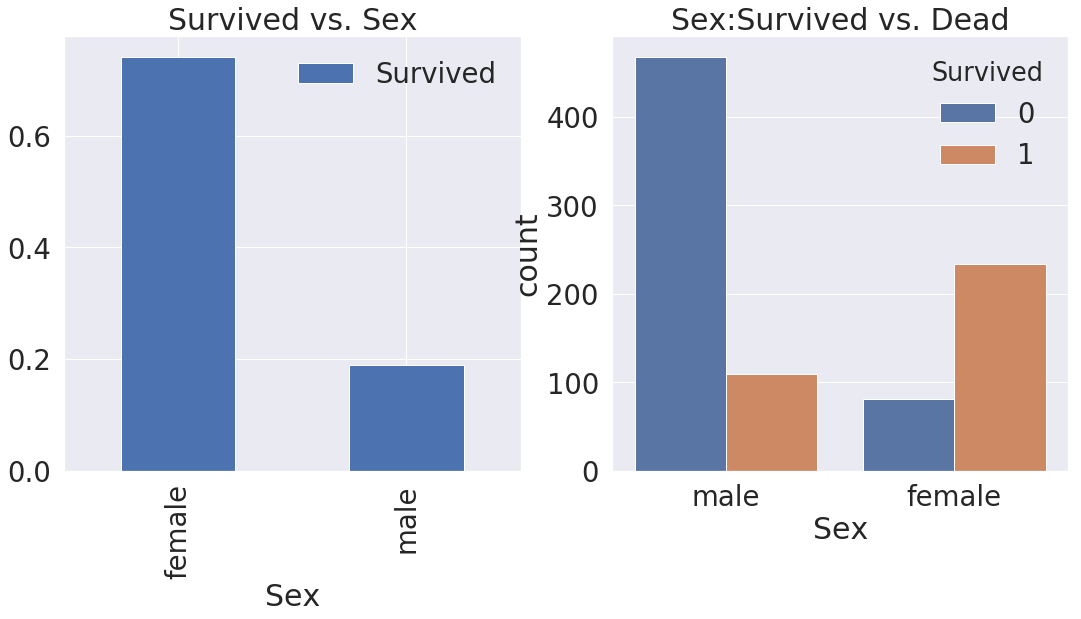

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex:Survived vs. Dead')

plt.show()

In [36]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [38]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.3 Both Sex and Pclass

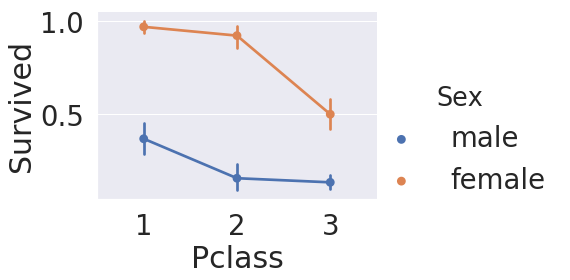

In [40]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=4, aspect=1.5)

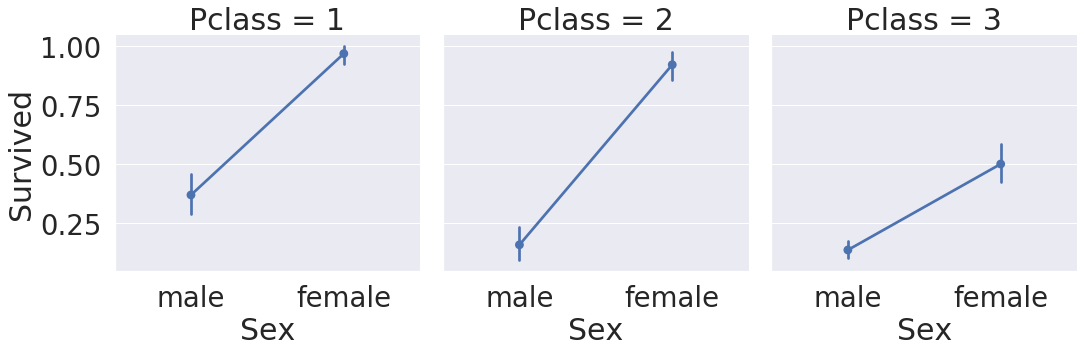

In [42]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, saturation=0.5, size=5, aspect=1)

### 2.4 Age

In [45]:
print('Age of Oldest Passenger : {:.1f} '.format(df_train['Age'].max()))
print('Age of Youngest Passenger : {:.1f}'.format(df_train['Age'].min()))
print('Average of Passenger : {:.1f}'.format(df_train['Age'].mean()))

Age of Oldest Passenger : 80.0 
Age of Youngest Passenger : 0.4
Average of Passenger : 29.7


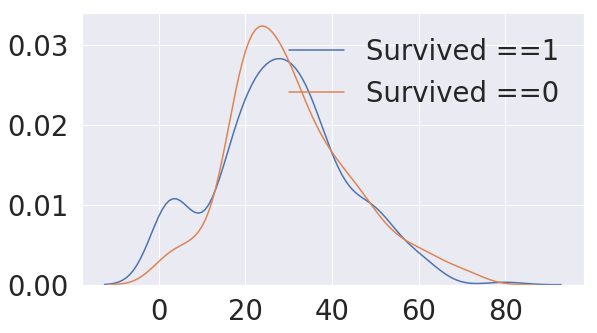

In [46]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)

plt.legend(['Survived ==1', 'Survived ==0'])

plt.show()

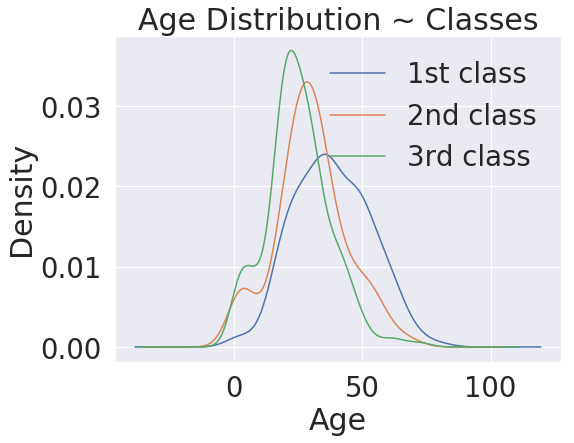

In [47]:
# Age Distribution ~ Classes

plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution ~ Classes')
plt.legend(['1st class', '2nd class', '3rd class'])

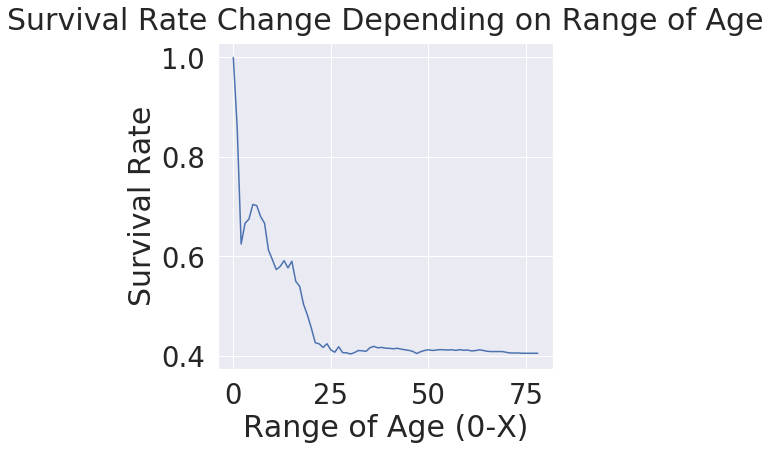

In [48]:
cummulate_survival_ratio = []

for i in range(1,80):
  cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/ len(df_train[df_train['Age']<i]['Survived']))
  
plt.figure(figsize=(6,6))
plt.plot(cummulate_survival_ratio)
plt.title('Survival Rate Change Depending on Range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age (0-X)')

plt.show()

### 2.5 Pclass, Sex, Age

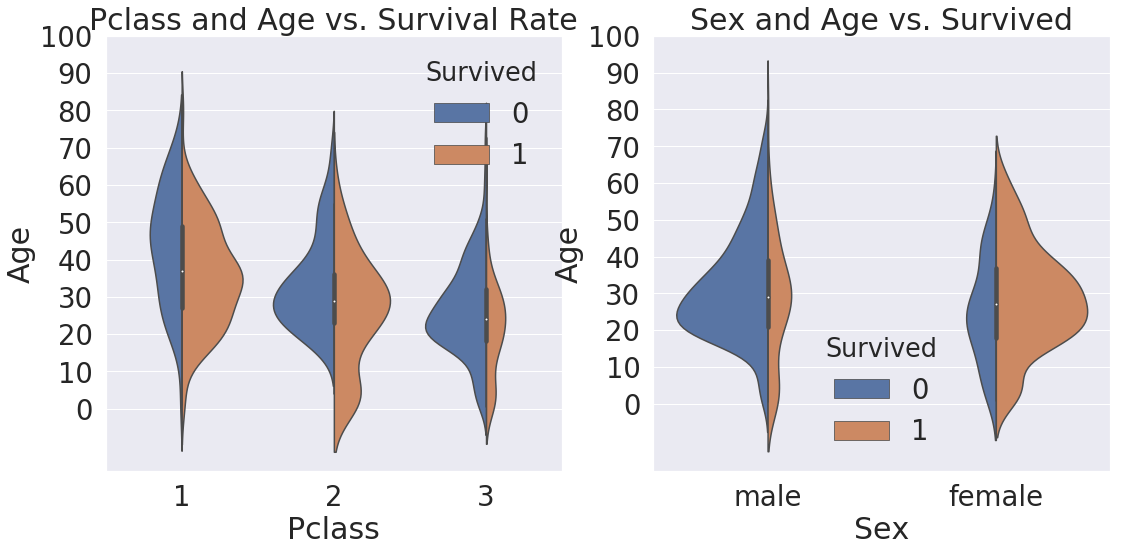

In [49]:
f, ax =plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count',
              split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survival Rate')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count',
              split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

### 2.6 Embarked

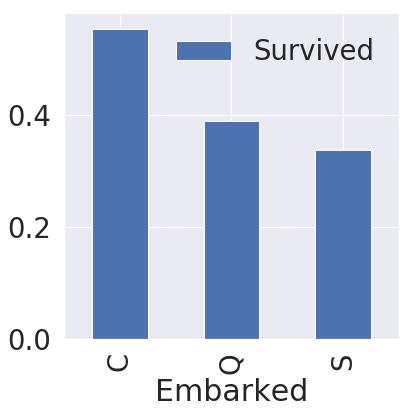

In [50]:
f, ax = plt.subplots(1, 1, figsize=(6,6))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived',
                                                                                          ascending=False).plot.bar(ax=ax)

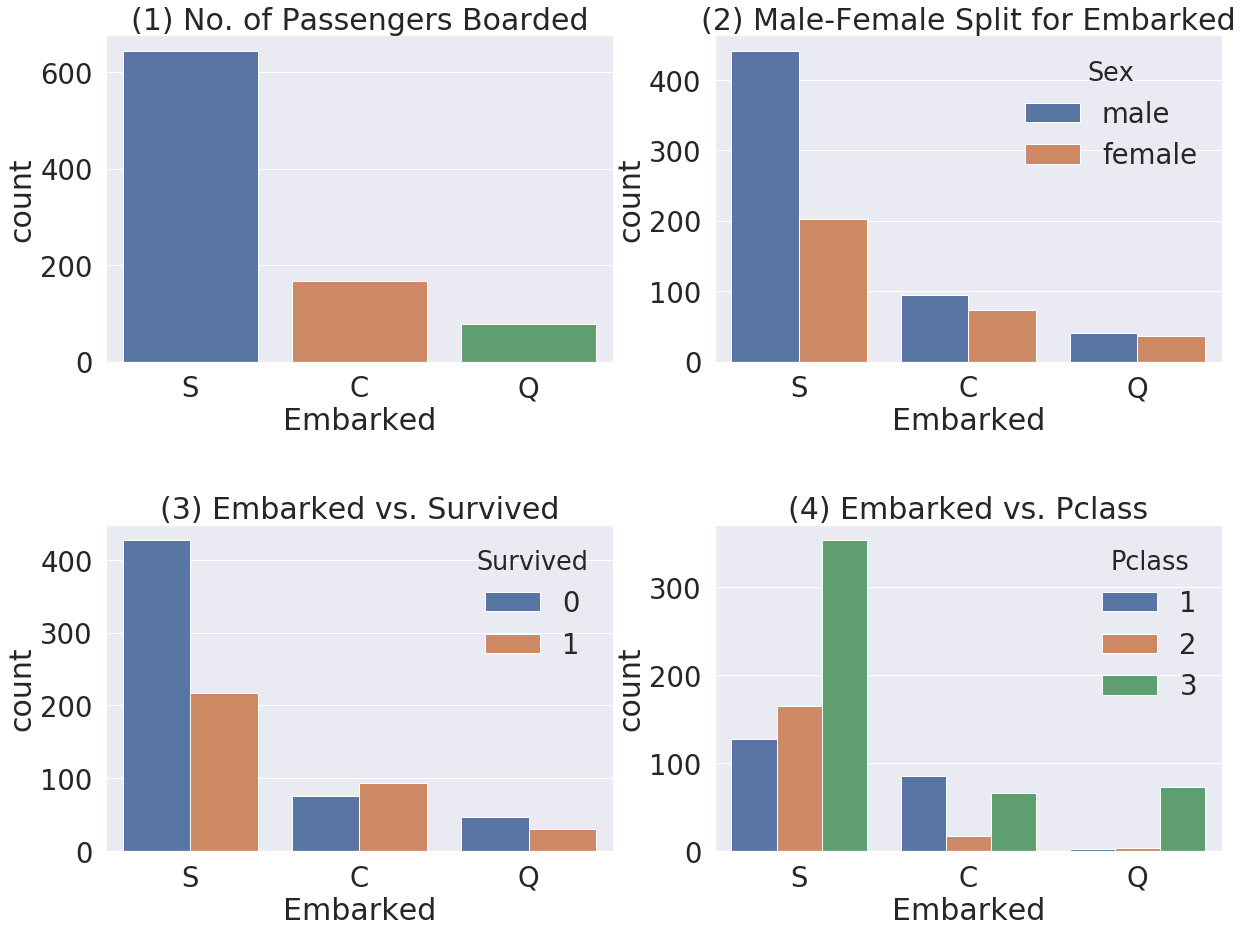

In [51]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs. Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### 2.7 Family ~ SibSP + Parch

In [0]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1

In [53]:
print('Maximum size of the family: ', df_train['FamilySize'].max())
print('Minimum size of the family: ', df_train['FamilySize'].min())

Maximum size of the family:  11
Minimum size of the family:  1


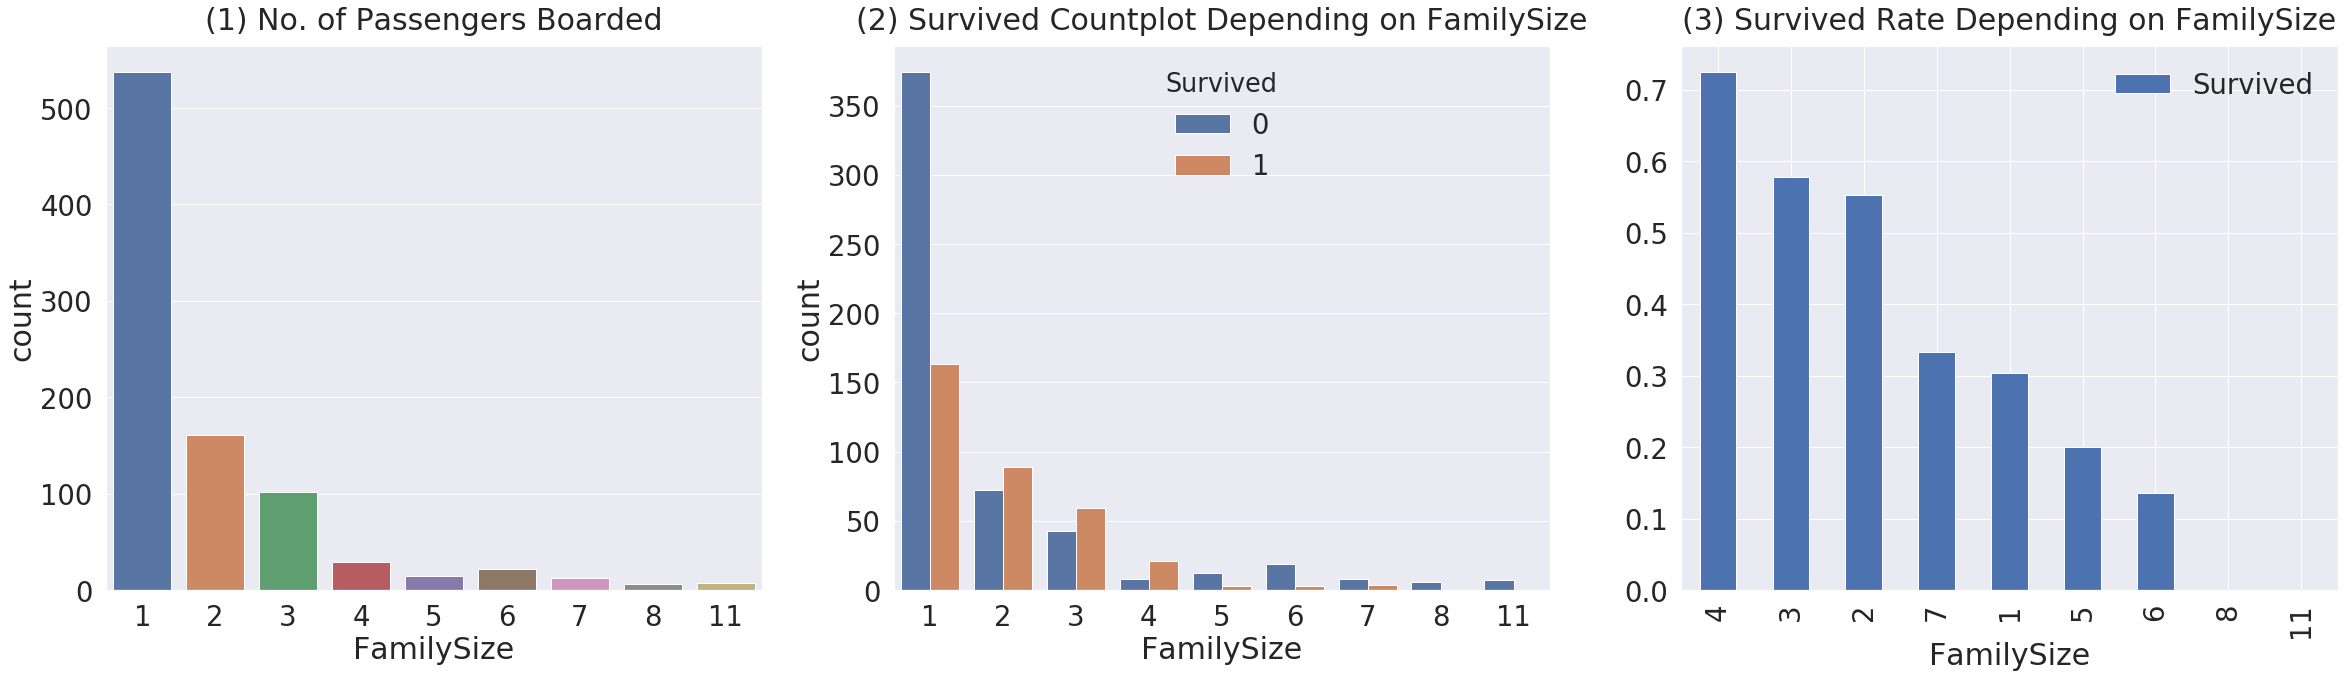

In [56]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived Countplot Depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',
                                                                                              ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived Rate Depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare

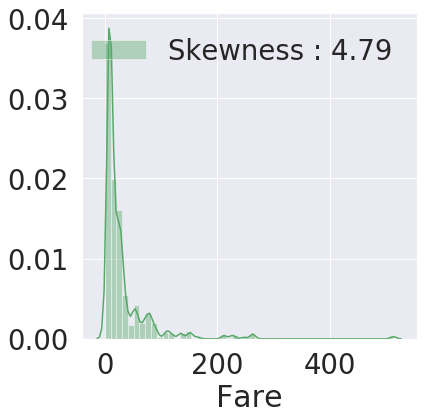

In [58]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

g= sns.distplot(df_train['Fare'], color='g', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

g=g.legend(loc='best')

In [0]:
#우선 test의 nan값 value를 평균값으로 대체 -
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [0]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

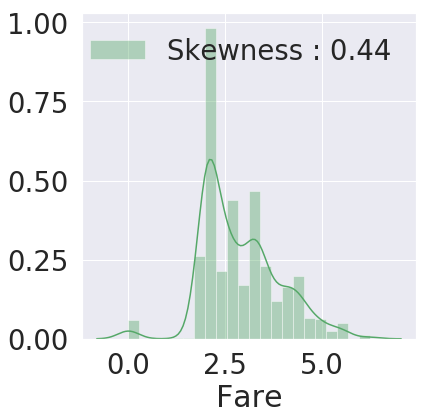

In [61]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

g = sns.distplot(df_train['Fare'], color='g', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

### 2.9 Cabin

In [62]:
df_train['Cabin'].isnull().sum()

687

### 2.10 Ticket

In [63]:
df_train['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
CA 2144              6
3101295              6
347088               6
S.O.C. 14879         5
382652               5
W./C. 6608           4
19950                4
17421                4
113760               4
347077               4
2666                 4
4133                 4
113781               4
LINE                 4
PC 17757             4
349909               4
F.C.C. 13529         3
230080               3
363291               3
345773               3
239853               3
29106                3
C.A. 31921           3
110413               3
PC 17572             3
35273                3
13502                3
                    ..
C.A. 33595           1
236171               1
PC 17599             1
2693                 1
349245               1
STON/O 2. 3101293    1
248698               1
28425                1
17466                1
350034               1
236852               1
349201               1
PC 17609   

In [64]:
import plotly.offline as py
py.init_notebook_mode (connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

## 3. **Feature** Engineering

### 3.1 Fill Null
###  3.1.1 Fill Age Null Using Title

In [66]:
df_train['Age'].isnull().sum()

177

In [0]:
# Extracting Noun Elements from Name Column
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

In [69]:
df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [70]:
df_test['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [71]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [73]:
df_train['Initial'].unique(), df_test['Initial'].unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object),
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object))

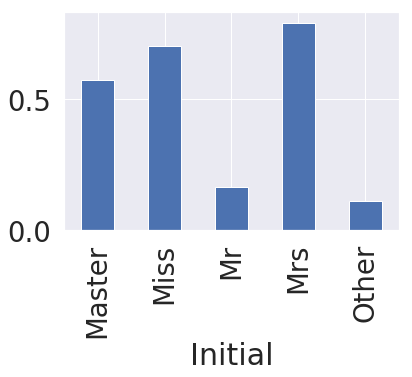

In [75]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

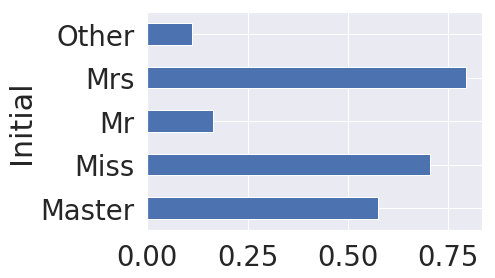

In [76]:
df_train.groupby('Initial')['Survived'].mean().plot.barh()

In [77]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [0]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [79]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


In [80]:
print('Embarked has', df_train['Embarked'].isnull().sum(), 'Null values')

Embarked has 2 Null values


In [0]:
df_train['Embarked'].fillna('S', inplace=True)

### 3.2 Change Age (Continuous to Categorical)

In [0]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] <10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

In [0]:
df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10 , 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [0]:
#아니면 아래오 같이 스마트하게....

def category_age(x):
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x < 30:
    return 2
  elif x < 40:
    return 3
  elif x < 50:
    return 4
  elif x < 60:
    return 5
  elif x < 70:
    return 6
  else:
    return 7
  
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [86]:
print('If method 1 == 2, return true => ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

If method 1 == 2, return true =>  True


In [0]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace = True)
df_test.drop(['Age'], axis=1, inplace = True)

### 3.3 Change Initial, Embakred and Sex from string to numerical

In [0]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs':3, 'Other':4})
df_test['Initial'] =df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other': 4})

In [89]:
df_train['Initial'].unique(), df_test['Initial'].unique()

(array([2, 3, 1, 0, 4]), array([2, 3, 1, 0, 4]))

In [90]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [91]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [94]:
df_train.isnull().sum(), df_test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 FamilySize       0
 Initial          0
 Age_cat          0
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 FamilySize       0
 Initial          0
 Age_cat          0
 dtype: int64)

In [96]:
df_train['Embarked'].isnull().any()

False

In [0]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0, 'male':1})

In [98]:
df_train['Sex'].unique(), df_test['Sex'].unique()

(array([1, 0]), array([1, 0]))

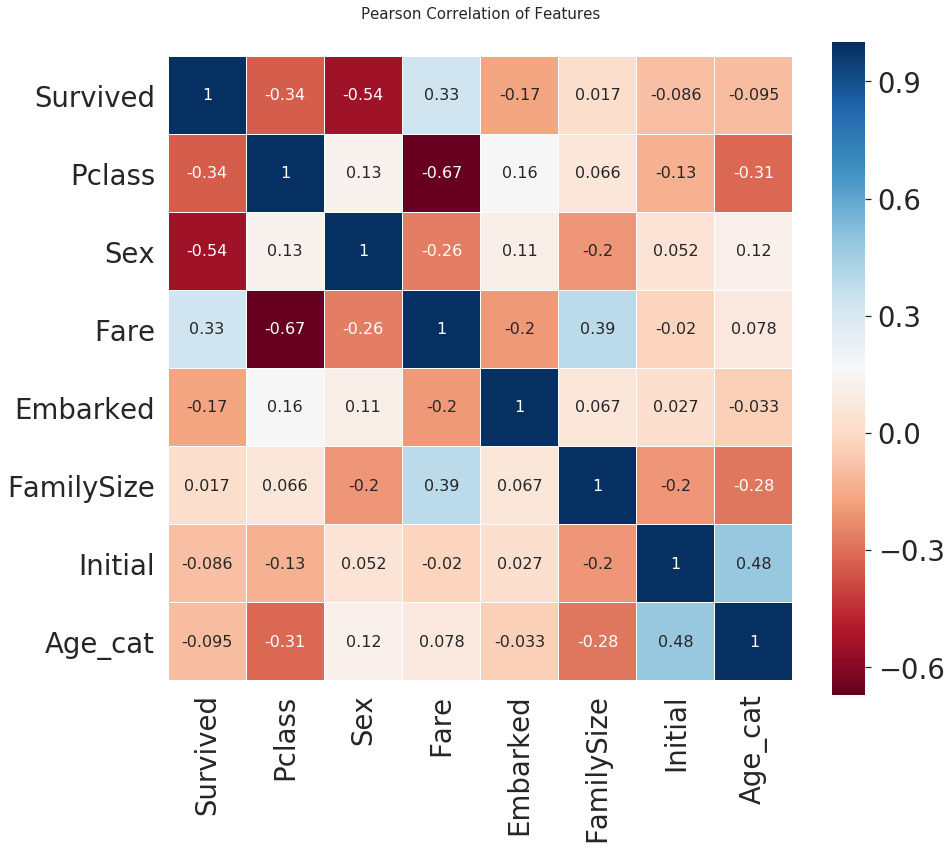

In [99]:
heatmap_data = df_train[['Survived', 'Pclass','Sex', 'Fare', 'Embarked', 'FamilySize', 
                        'Initial', 'Age_cat']]

colormap = plt.cm.RdBu

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square = True, cmap=colormap, linecolor='white', annot=True,
           annot_kws={'size': 16})

del heatmap_data

### One-hot Encoding on Initial and Embarked

In [0]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [103]:
df_train.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Age_cat',
       'Initial_0', 'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4'],
      dtype='object')

In [104]:
df_test.columns.unique()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Age_cat', 'Initial_0',
       'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4'],
      dtype='object')

In [0]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [106]:
df_train.columns.unique(), df_test.columns.unique()

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Age_cat', 'Initial_0',
        'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
        'Embarked_1', 'Embarked_2'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'FamilySize', 'Age_cat', 'Initial_0', 'Initial_1',
        'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0', 'Embarked_1',
        'Embarked_2'],
       dtype='object'))

### 3.5 Drop Columns

In [0]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace = True)

In [108]:
df_train.columns.unique(), df_test.columns.unique()

(Index(['Survived', 'Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat',
        'Initial_0', 'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4',
        'Embarked_0', 'Embarked_1', 'Embarked_2'],
       dtype='object'),
 Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Age_cat', 'Initial_0',
        'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
        'Embarked_1', 'Embarked_2'],
       dtype='object'))

## 4. Predict Outcome Using Trained Model by Building Machine Learning Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 4.1 Preparation - Dataset Split by Train/Valid Test Sets

In [0]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [0]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3,
                                           random_state=2019)

### 4.2 Model Generation and Prediction

In [0]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [113]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0],
                                          100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 81.72% 정확도로 생존을 맞춤


### 4.3 Feature Importance

In [0]:
from pandas import Series

In [0]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

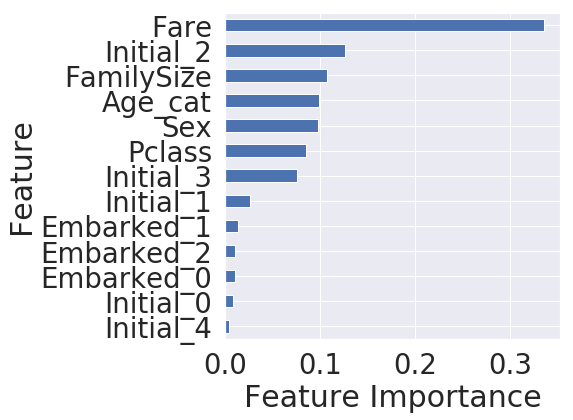

In [117]:
plt.figure(figsize=(6,6))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()